In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Data_CNN/training'
valid_path = '/content/drive/My Drive/Data_CNN/test'

# add preprocessing layer to the front of VGG
inception_resnet_v2 = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception_resnet_v2.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/My Drive/Data_CNN/training/*')
  

# our layers - you can add more if you want
x = Flatten()(inception_resnet_v2.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception_resnet_v2.input, outputs=prediction)

# view the structure of the model
model.summary()


219062272/219055592 [==============================] - 17s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
________________________

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Data_CNN/training',
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Data_CNN/test',
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss

Found 8530 images belonging to 3 classes.
Found 2759 images belonging to 3 classes.
Epoch 1/30
427/427 [==============================] - 8578s 20s/step - loss: 2.0954 - accuracy: 0.4426 - val_loss: 2.7432 - val_accuracy: 0.4074
Epoch 2/30
427/427 [==============================] - 218s 511ms/step - loss: 2.3535 - accuracy: 0.4751 - val_loss: 9.1357 - val_accuracy: 0.4114
Epoch 3/30
427/427 [==============================] - 216s 505ms/step - loss: 2.3828 - accuracy: 0.4857 - val_loss: 4.1406 - val_accuracy: 0.4114
Epoch 4/30
427/427 [==============================] - 214s 500ms/step - loss: 2.5013 - accuracy: 0.4926 - val_loss: 2.8166 - val_accuracy: 0.4001
Epoch 5/30
427/427 [==============================] - 213s 499ms/step - loss: 2.7416 - accuracy: 0.4886 - val_loss: 8.6857 - val_accuracy: 0.4074
Epoch 6/30
427/427 [==============================] - 212s 496ms/step - loss: 2.4098 - accuracy: 0.5121 - val_loss: 3.7091 - val_accuracy: 0.3864
Epoch 7/30
427/427 [=====================

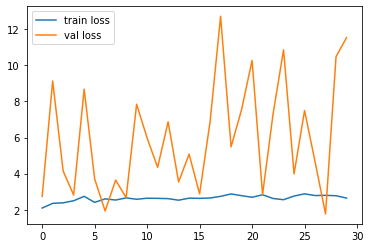

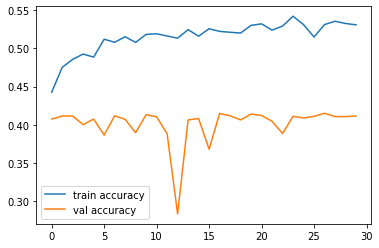

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')